In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.shape

(90239, 6)

In [90]:
new_df = df.sample(2000, random_state=2)

In [91]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1.0,0.0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1.0,1.0,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1.0,1.0,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1.0,0.0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0.0,0.0,39,47,50,59


In [92]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    q = q.replace('[math]', '')
    
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q
    

In [93]:
preprocess("I've already!<b>done</b>?")

'i have already done'

In [94]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [95]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1.0,0.0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1.0,1.0,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1.0,1.0,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1.0,0.0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0.0,0.0,39,47,50,59


In [96]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [97]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1.0,0.0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1.0,1.0,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1.0,1.0,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1.0,0.0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0.0,0.0,39,47,50,59


In [98]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [99]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1.0,0.0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1.0,1.0,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1.0,1.0,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1.0,0.0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0.0,0.0,39,47,50,59


In [100]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [101]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1.0,0.0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1.0,1.0,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1.0,1.0,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1.0,0.0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0.0,0.0,39,47,50,59


In [102]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1.0,0.0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1.0,1.0,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1.0,1.0,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1.0,0.0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0.0,0.0,39,47,50,59


In [103]:
# Advanced Features
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [105]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.499975,0.333322,0.666656,0.571420,1,0,81,82,79,87
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.999950,0.666644,0.599988,0.599988,1,1,76,67,73,87
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.999967,0.428565,0.857131,0.315788,1,1,38,81,42,90
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.428565,0.374995,0.499996,0.461535,1,0,49,50,49,60
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.583328,0.538457,0.499998,0.370369,0,0,39,47,50,59


In [106]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [107]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [108]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len,longest_substr_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.571420,1,0,81,82,79,87,1,6.5,0.435897
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.599988,1,1,76,67,73,87,0,5.0,0.516129
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.315788,1,1,38,81,42,90,12,13.0,0.606061
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.461535,1,0,49,50,49,60,1,12.5,0.320000
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.370369,0,0,39,47,50,59,7,23.5,0.185185


In [109]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [110]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [111]:
print(new_df.shape)
new_df.head()

(2000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len,longest_substr_ratio
88465,88465,148787,148788,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi,1,43,38,7,6,...,0.571420,1,0,81,82,79,87,1,6.5,0.435897
21014,21014,39600,39601,how can one overcome procrastination,how can i beat procrastination,1,36,30,5,5,...,0.599988,1,1,76,67,73,87,0,5.0,0.516129
51992,51992,92134,92135,how is daily life in north korea,how is life in north korea what are the typica...,1,32,105,7,19,...,0.315788,1,1,38,81,42,90,12,13.0,0.606061
7671,7671,14976,14977,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay,1,49,49,12,13,...,0.461535,1,0,49,50,49,60,1,12.5,0.320000
65011,65011,112886,112887,do you know of any real time successful person...,are there any oxford historians who achieved s...,0,147,107,27,20,...,0.370369,0,0,39,47,50,59,7,23.5,0.185185


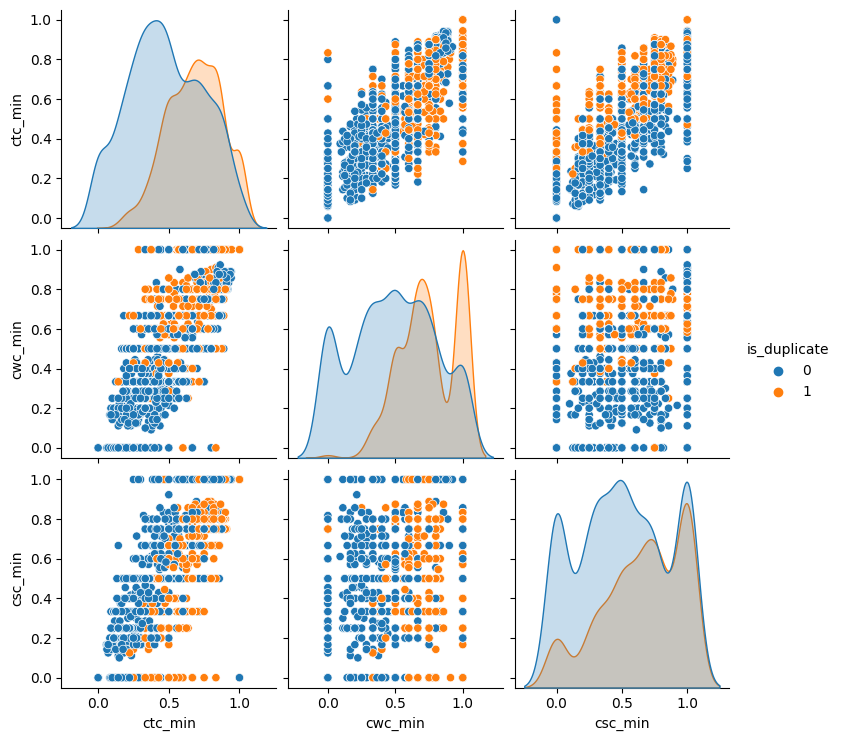

In [112]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

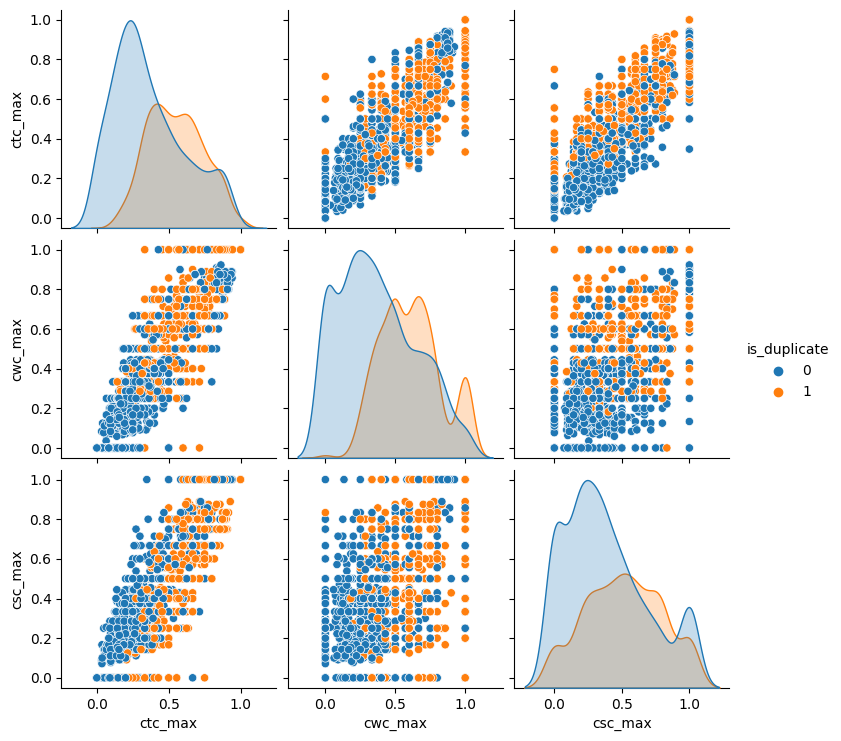

In [113]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

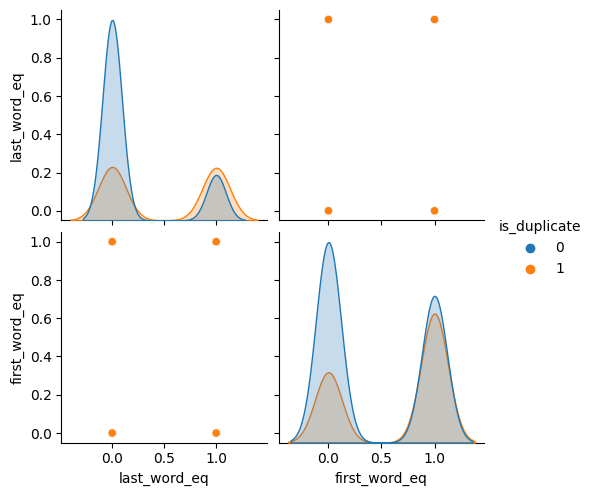

In [114]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

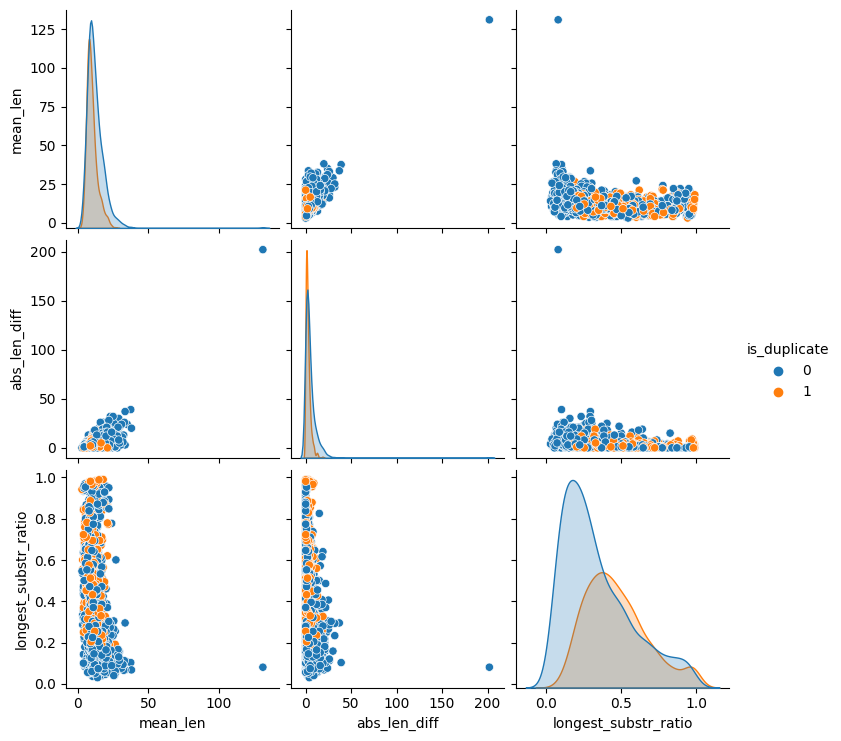

In [115]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

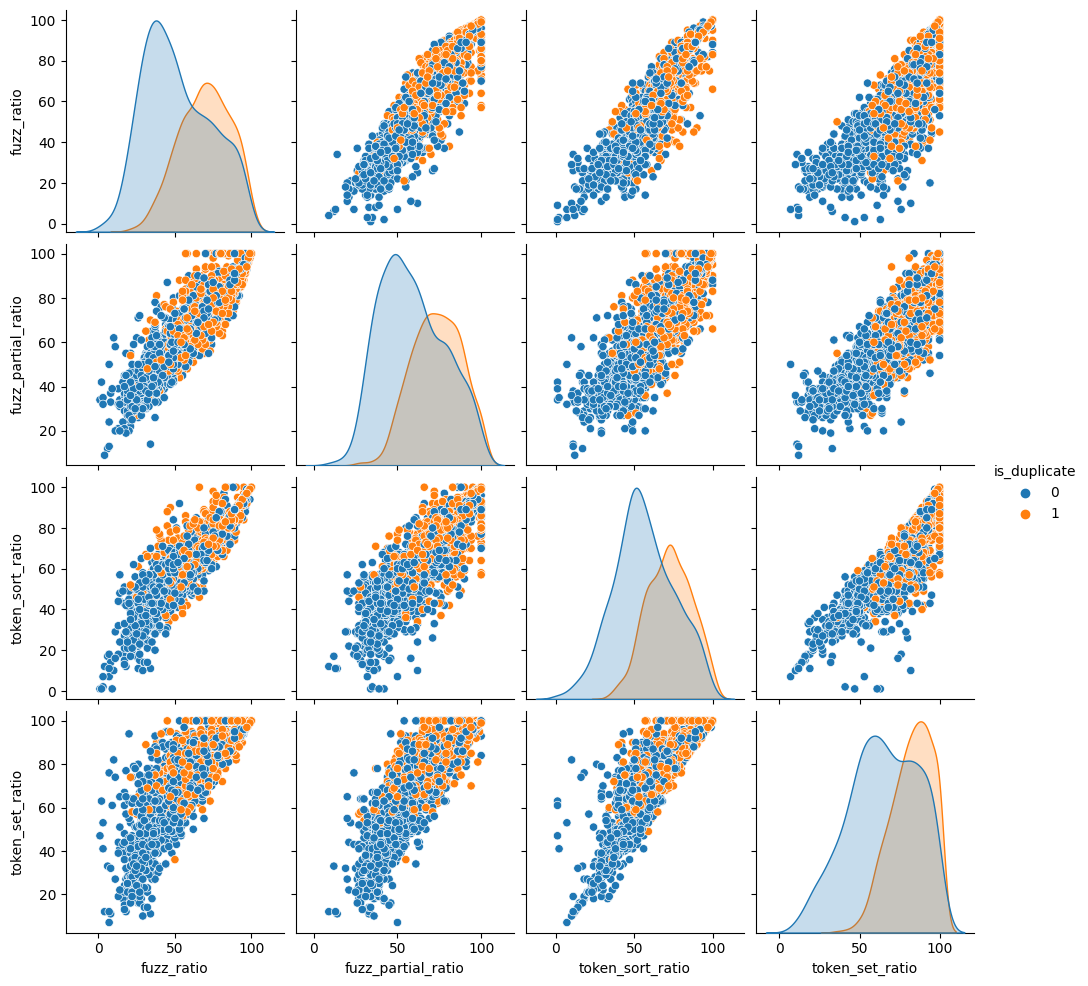

In [116]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [117]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [118]:
# Replaced with 2 TSNE features

from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.032s...
[t-SNE] Computed neighbors for 2000 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.170812
[t-SNE] Computed conditional probabilities in 0.088s
[t-SNE] Iteration 50: error = 72.3725433, gradient norm = 0.1313017 (50 iterations in 0.568s)
[t-SNE] Iteration 100: error = 61.7491379, gradient norm = 0.0161765 (50 iterations in 0.496s)
[t-SNE] Iteration 150: error = 60.3324432, gradient norm = 0.0105533 (50 iterations in 0.512s)
[t-SNE] Iteration 200: error = 59.7578430, gradient norm = 0.0067474 (50 iterations in 0.528s)
[t-SNE] Iteration 250: error = 59.4292526, gradient norm = 0.0052985 (50 iterations in 0.488s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.429253
[t-SNE] Iteration 300: error = 1.3433517, gradient norm = 0.0186585 (50 iterations in 0.560s)

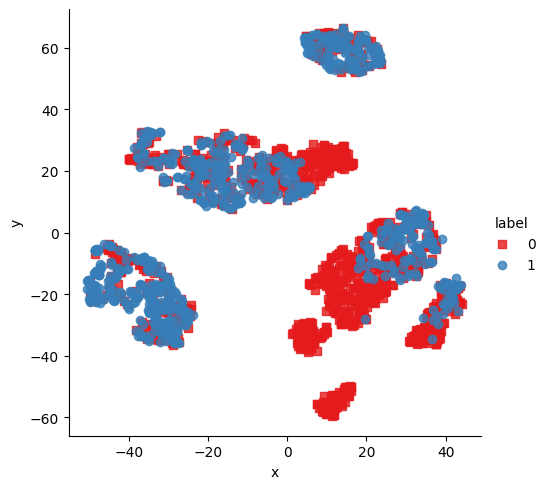

In [119]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

In [120]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.008s...
[t-SNE] Computed neighbors for 2000 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.170812
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 73.7427292, gradient norm = 0.1339440 (50 iterations in 0.992s)
[t-SNE] Iteration 100: error = 60.9431381, gradient norm = 0.0088843 (50 iterations in 0.840s)
[t-SNE] Iteration 150: error = 59.8825073, gradient norm = 0.0044977 (50 iterations in 0.808s)
[t-SNE] Iteration 200: error = 59.4597359, gradient norm = 0.0032288 (50 iterations in 0.816s)
[t-SNE] Iteration 250: error = 59.2193985, gradient norm = 0.0024563 (50 iterations in 0.816s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.219398
[t-SNE] Iteration 300: error = 1.1655271, gradient norm = 0.0097102 (50 iterations in 1.088s)

In [121]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [122]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
88465,what do bangladeshis think of indira gandhi,how do bangladeshis view indira gandhi
21014,how can one overcome procrastination,how can i beat procrastination
51992,how is daily life in north korea,how is life in north korea what are the typica...
7671,what are some subtle ways to tell if a guy is gay,how can i tell if a guy i am interested in is gay
65011,do you know of any real time successful person...,are there any oxford historians who achieved s...


In [123]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(2000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len,longest_substr_ratio
88465,1,43,38,7,6,4,13,0.31,0.749981,0.749981,...,0.571420,1,0,81,82,79,87,1,6.5,0.435897
21014,1,36,30,5,5,3,10,0.30,0.499975,0.333322,...,0.599988,1,1,76,67,73,87,0,5.0,0.516129
51992,1,32,105,7,19,6,22,0.27,0.749981,0.374995,...,0.315788,1,1,38,81,42,90,12,13.0,0.606061
7671,1,49,49,12,13,6,24,0.25,0.749981,0.599988,...,0.461535,1,0,49,50,49,60,1,12.5,0.320000
65011,0,147,107,27,20,10,45,0.22,0.374995,0.249998,...,0.370369,0,0,39,47,50,59,7,23.5,0.185185


In [124]:
from sklearn.feature_extraction.text import CountVectorizer

# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [125]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(2000, 6000)

In [126]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(2000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
88465,1,43,38,7,6,4,13,0.31,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0
21014,1,36,30,5,5,3,10,0.30,0.499975,0.333322,...,0,0,0,0,0,0,0,0,0,0
51992,1,32,105,7,19,6,22,0.27,0.749981,0.374995,...,0,0,0,0,0,0,0,0,0,0
7671,1,49,49,12,13,6,24,0.25,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0
65011,0,147,107,27,20,10,45,0.22,0.374995,0.249998,...,0,0,0,0,0,0,0,0,0,0


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.735

In [129]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.755

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[209,  53],
       [ 53,  85]], dtype=int64)

In [132]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[205,  57],
       [ 41,  97]], dtype=int64)

In [133]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [134]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [135]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [136]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [137]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [138]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [139]:
q1 = 'How do I reset Gmail account password?'
q2 = 'How do I reset a Gmail password?'
# q3 = 'Which city serves as the capital of India?'
# q4 = 'What is the business capital of India?'

In [140]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [141]:
cv

CountVectorizer(max_features=3000)

In [142]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(cv,open('stopwords.pkl','wb'))